In [ ]:
# Llibreries per generar les dades del problema 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split


from math import sqrt  # Funció per calcular l'arrel quadrada d'una variable 
import matplotlib.pyplot as plt # Llibreria per dibuixar gràfics 

## Dades

Generem un problema de classificació de dades en què hi ha 4 classes diferents.
El conjunt de dades consta de 400 mostres, ens quedem el 75% (X\_train) per entrenar el model i el 25% (X\_test) restant ens servirà per avaluar-ho.

Noteu que cada mostra del conjunt de dades té dues dimensions com es pot observar al gràfic. 



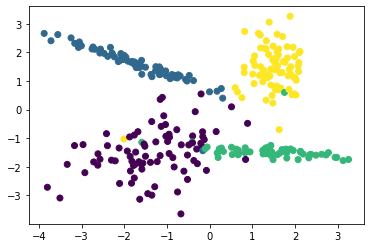

In [ ]:
# Nota: Aquest codi no es pot canviar 
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                                     n_repeated=0, n_classes=4, n_clusters_per_class=1, class_sep=1.5, 
                                     random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


# Visualitzem les dades d'entrenament 
plt.scatter(X_train[:,0], X_train[:,1],c=y_train);

## Càlculs


In [ ]:
# Funció distància euclidea 
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Funció per trobar els veïns més propers 
def get_neighbors(train, labels, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append(dist)

	ordered_labels = [x for _,x in sorted(zip(distances, labels))]
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(ordered_labels[i])
	return neighbors

# Funció per predir la classe d'un conjunt de dades:
# train: conjunt d'entrenament, amb què compararem. Matriu amb número
# de files = nombre d'elements al conjunt i 2 columnes.
#
# labels: etiquetes del conjunt d'entrenament. Llista amb número
# de files = nombre d'elements al conjunt
#
# test: conjunt davaluació. Matriu amb número
# de files = nombre d'elements al conjunt i 2 columnes.
#
# num_neighbors: Veïns a considerar 
def predict_classification(train, labels, test, num_neighbors):
	predictions = list()
	for test_row in test: 
		neighbors = get_neighbors(train, labels, test_row, num_neighbors)
		prediction = max(set(neighbors), key=neighbors.count)
		predictions.append(prediction)
	return predictions

## Clasificació

Fem servir el 25% que hem reservat per avaluar el model ho avaluem amb diferents veïns i obtenim la predicció. 

In [ ]:
from sklearn.metrics import confusion_matrix


for i in range(1,5):
  prediction = predict_classification(X_train, y_train, X_test, i) 
  print("Resultats k = ", i)
  cf = confusion_matrix(y_test, prediction)
  print(cf)
  tp = 0  
  for j in range(cf.shape[0]):

    tp += cf[j][j]

  print("True Positives: ", tp)



Resultados k =  1
[[17  0  1  0]
 [ 0 28  0  0]
 [ 0  0 32  0]
 [ 2  0  0 20]]
True Positives:  97
Resultados k =  2
[[17  0  1  0]
 [ 2 26  0  0]
 [ 0  0 32  0]
 [ 2  0  0 20]]
True Positives:  95
Resultados k =  3
[[17  0  1  0]
 [ 1 27  0  0]
 [ 0  0 32  0]
 [ 2  0  0 20]]
True Positives:  96
Resultados k =  4
[[17  0  1  0]
 [ 0 27  0  1]
 [ 0  0 32  0]
 [ 2  0  0 20]]
True Positives:  96
